### 웹 스크랩핑

In [9]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 75.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from lxml import html

In [5]:
# HTML 문서 파싱
html_content = """
<html>
    <head>
        <title>
           <h1> 웹 스크랩핑 </h1>
        </title>
    </head>
    <body>
         <div>
             <h2>웹 스크랩핑 연습</h2>
             <p class="intro">이것은 예제 문서입니다.</p>
             <ul>
               <li>python</li>
               <li>XPath</li>
               <li>HTML</li>
             </ul>
             <a href="https://example.com" class="link">Example</a>
         </div>
    </body>
</html>
"""

In [11]:
print(html_content)


<html>
    <head>
        <title>
           <h1> 웹 스크랩핑 </h1>
        </title>
    </head>
    <body>
         <div>
             <h2>웹 스크랩핑 연습</h2>
             <p class="intro">이것은 예제 문서입니다.</p>
             <ul>
               <li>python</li>
               <li>XPath</li>
               <li>HTML</li>
             </ul>
             <a href="https://example.com" class="link">Example</a>
         </div>
    </body>
</html>



In [ ]:
# fromstring(): 문자열을 **트리 구조(DOM 구조)로 변환
tree = html.fromstring(html_content)
print(tree)

<Element html at 0x22204600780>


| 하고 싶은 일            | 트리 구조 덕분에 가능해지는 것                 |
|------------------------|----------------------------------------------|
| 제목만 추출하기         | `tree.xpath("//title/text()")`               |
| 링크 주소만 모으기      | `tree.xpath("//a/@href")`                    |
| 특정 클래스 가진 태그 찾기 | `tree.xpath('//div[@class="target"]')`       |
| 텍스트 전부 추출        | `tree.xpath("//text()")`                     |
| 이미지 주소 추출        | `tree.xpath("//img/@src")`                   |
| 테이블 내용 가져오기    | `tree.xpath("//table//tr/td/text()")`        |

In [14]:
# Xpath 로 요소 선택
title = tree.xpath('//h1/text()')   # h1 tag 값을 가져옴 
print(title)

[' 웹 스크랩핑 ']


In [72]:
tree.xpath("//text()")

['\n    ',
 '\n        ',
 '\n           ',
 ' 웹 스크랩핑 ',
 '\n        ',
 '\n    ',
 '\n    ',
 '\n         ',
 '\n             ',
 '웹 스크랩핑 연습',
 '\n             ',
 '이것은 예제 문서입니다.',
 '\n             ',
 '\n               ',
 'python',
 '\n               ',
 'XPath',
 '\n               ',
 'HTML',
 '\n             ',
 '\n             ',
 'Example',
 '\n         ',
 '\n    ',
 '\n']

In [ ]:
paragraph = tree.xpath('//p[@class="intro"]/text()') # intro 클래스를 가진 <p> 태그의 텍스트 추출
print(paragraph)

['이것은 예제 문서입니다.']


In [16]:
first_item = tree.xpath('//ul/li[1]/text()')   # ul > li[1]tag 값을 가져옴 
print(first_item)

['python']


In [17]:
link = tree.xpath('//a[@class="link"]/@href')
print(link)

['https://example.com']


### 웹 스크래핑 준비 사항

In [ ]:
# 라이브러리  import
from selenium import webdriver
from selenium.webdriver.common.by import By

In [75]:
# 브라우저 드라이버 실행
driver = webdriver.Chrome()     #  크롬 드라이버 사용
driver.get('https://example.com')

In [76]:
element = driver.find_element(By.XPATH, '//h1') # 문서내의 첫 번째 <h1> 태그를 찾는 XPath
print('Element Text: ', element.text)

Element Text:  Example Domain


In [77]:
elements = driver.find_elements(By.XPATH, '//h1')
for el in elements:
    print(el.text)

Example Domain


In [78]:
driver.quit() # 브라우저 종료료

### Requests

In [84]:
import requests

In [85]:
url = 'https://www.naver.com'
response = requests.get(url)
print('응답 코드 : ', response.status_code)  # 200 정상 처리, 404: not found 

응답 코드 :  200


In [25]:
response

<Response [200]>

In [81]:
response.content

b'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d

In [82]:
response.headers

{'Date': 'Mon, 21 Apr 2025 01:19:57 GMT', 'content-type': 'text/html; charset=UTF-8', 'transfer-encoding': 'chunked', 'set-cookie': 'PM_CK_loc=6a192e3944d746fabec890f2ea556ba8093ed1f342ba2e79c1b70325a8d56cd6; Expires=Tue, 22 Apr 2025 01:19:57 GMT; Path=/; HttpOnly', 'cache-control': 'no-cache, no-store, must-revalidate', 'pragma': 'no-cache', 'x-frame-options': 'DENY', 'x-xss-protection': '1; mode=block', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=63072000; includeSubdomains', 'referrer-policy': 'unsafe-url', 'server': 'nfront'}

In [28]:
response.status_code

200

In [86]:
if response.status_code == requests.codes.ok:
    print('정상입니다')
else:
    print('문제가 있습니다')

정상입니다


In [ ]:
# response.raise_for_status()는 requests 라이브러리에서 
# HTTP 요청이 실패했을 때 예외를 발생시키는 메서드드
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [88]:
print(response.text[:100])

   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer


In [31]:
print(response.encoding)

UTF-8


In [32]:
html = response.text

open('naver.html', 'w', encoding='utf-8').write(html)

190202

In [89]:
url = 'https://www.google.com'
response = requests.get(url)
html = response.text
print(html)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="8bvbXwx-3egCJfuSebHrPA">(function(){var _g={kEI:'lJ4FaImPDJeRvr0PlKLX6AY',kEXPI:'0,202792,3497509,648,435,538661,78813,16105,344796,238458,11275,40311,5241682,106,87,16272693,20539756,25228681,11556,53900,72812,7147,6970,65161,6757,23879,9139,739,2,2,3856,328,6225,34310,29146,708,1342,5406,8301,49,8164,7422,30376,28339,24325,787,24989,4106,350,18880,1879,4943,2150,4614,5774,4310,10720,1621,9171,1789,9624,5265,1635,3254,8,458,2531,35,3420,3757,1911,4608,3207,570,3596,593,5663,1332,354,656,611,3971,445,99,3505,591,333,159,13212,921,816,198,1542,3366,224,4190,1158,223,121,89,920,93,505,1012,123,716,5,697,706,376,1647,117,2,1,2,2,2,3,1351,532,402,328,367,1199,217,2762,13,3,4185,350,310,371,406,158,3,12,805,2,64

In [ ]:
# //*[@id="logo"]

In [34]:
open('google.html', 'w', encoding='utf-8').write(html)

17910

In [35]:
google_logo = 'https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png'
response = requests.get(google_logo)
open('googlelogo.png', 'wb').write(response.content)
# 이미지나 PDF는 반드신 .context와 'wb'를 써야 제대로 저장

13504

In [4]:
article_word = """We observe today not a victory of a party but a celebration of freedom―symbolizing an end as well as a beginning―signifying renewal as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed1) nearly a century and three quarters ago.
The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe―the belief that the rights of man come not from the generosity of the state but from the hand of God.
We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation of Americans―born in this century, tempered by war, disciplined by a hard and bitter peace, proud of our ancient heritage―and unwilling to witness or permit the slow undoing of those human rights to which this nation has always been committed, and to which we are committed today at home and around the world.
Let every nation know, whether it wishes us well or ill, that we shall pay any price, bear any burden, meet any hardship, support any friend, oppose any foe to assure the survival and success of liberty.
This much we pledge―and more.
To those old allies whose cultural and spiritual origins we share, we pledge the loyalty of faithful friends. United, there is little we cannot do in a host of cooperative ventures. Divided, there is little we can do―for we dare not meet a powerful challenge at odds and split asunder.
To those new states2) whom we welcome to the ranks of the free, we pledge our word that one form of colonial control shall not have passed away merely to be replaced by a far more iron tyranny. We shall not always expect to find them supporting our view. But we shall always hope to find them strongly supporting their own freedom―and to remember that, in the past, those who foolishly sought power by riding the back of the tiger ended up inside.
To those peoples in the huts and villages of half the globe struggling to break the bonds of mass misery; we pledge our best efforts to help them help themselves, for whatever period is required―not because the Communists may be doing it, not because we seek their votes, but because it is right. If a free society cannot help the many who are poor, it cannot save the few who are rich.
To our sister republics south of our border3), we offer a special pledge―to convert our good words into good deeds―in a new alliance for progress―to assist free men and free governments in casting off the chains of poverty. But this peaceful revolution of hope cannot become the prey of hostile powers. Let all our neighbors know that we shall join with them to oppose aggression or subversion anywhere in the Americas. And let every other power know that this hemisphere4) intends to remain the master of its own house.
To that world assembly of sovereign states, the United Nations, our last best hope in an age where the instruments of war have far outpaced the instruments of peace, we renew our pledge of support―to prevent it from becoming merely a forum for invective―to strengthen its shield of the new and the weak―and to enlarge the area in which its writ may run.
Finally, to those nations who would make themselves our adversary, we offer not a pledge but a request: that both sides begin anew the quest for peace, before the dark powers of destruction unleashed by science engulf all humanity in planned or accidental self-destruction.
We dare not tempt them with weakness. For only when our arms are sufficient beyond doubt can we be certain beyond doubt that they will never be employed.
But neither can two great and powerful groups of nations take comfort from our present course―both sides overburdened by the cost of modern weapons, both rightly alarmed by the steady spread of the deadly atom, yet both racing to alter that uncertain balance of terror that stays the hand of mankind’s final war.
So let us begin anew―remembering on both sides that civility is not a sign of weakness, and sincerity is always subject to proof. Let us never negotiate out of fear. But let us never fear to negotiate.
Let both sides explore what problems unite us instead of belaboring those problems which divide us. Let both sides, for the first time, formulate serious and precise proposals for the inspection and control of arms―and bring the absolute power to destroy other nations under the absolute control of all nations.
Let both sides seek to invoke the wonders of science instead of its terrors. Together let us explore the stars, conquer the deserts, eradicate disease, tap the ocean depths, and encourage the arts and commerce.
Let both sides unite to heed in all corners of the earth the command of Isaiah―to “undo the heavy burdens and to let the oppressed go free.”5)
And if a beachhead of cooperation may push back the jungle of suspicion, let both sides join in a new endeavor―not a new balance of power, but a new world of law, where the strong are just and the weak secure and the peace preserved.
All this will not be finished in the first one hundred days.6) Nor will it be finished in the first one thousand days, nor in the life of this administration, nor even perhaps in our lifetime on this planet. But let us begin.
In your hands, my fellow citizens, more than mine, will rest the final success or failure of our course. Since this country was founded, each generation of Americans has been summoned to give testimony to its national loyalty. The graves of young Americans who answered the call to service surround the globe.
Now the trumpet summons us again―not as a call to bear arms, though arms we need―not as a call to battle, though embattled we are―but a call to bear the burden of a long twilight struggle, year in and year out, “rejoicing in hope, patient in tribulation”7)―a struggle against the common enemies of man: tyranny, poverty, disease, and war itself.
Can we forge against these enemies a grand and global alliance, North and South, East and West,8) that can assure a more fruitful life for all mankind? Will you join in that historic effort?
In the long history of the world, only a few generations have been granted the role of defending freedom in its hour of maximum danger. I do not shrink from this responsibility―I welcome it. I do not believe that any of us would exchange places with any other people or any other generation. The energy, the faith, the devotion which we bring to this endeavor will light our country and all who serve it―and the glow from that fire can truly light the world.
And so, my fellow Americans, ask not what your country can do for you―ask what you can do for your country.
My fellow citizens of the world, ask not what America will do for you, but what together we can do for the freedom of man.
Finally, whether you are citizens of America or citizens of the world, ask of us here the same high standards of strength and sacrifice which we ask of you. With a good conscience our only sure reward, with history the final judge of our deeds, let us go forth to lead the land we love, asking his blessing and his help, but knowing that here on earth God’s work must truly be our own.
"""

In [39]:
 pip install spacy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------- ----------------- 6.6/11.8 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 29.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 27.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   --------------------------------------- 632.6/632.6 kB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 24.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------------- ------------------------ 2.4/6.3 MB 11.2 MB/s eta 0:00:01
   ------------------------------------ --- 5.8/6.3 MB 13.6 MB/s eta 0:00:01
   --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -------------------------------------- 12.8/12.8 MB 100.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# pip install spacy
# python -m spacy download en_core_web_sm

# spacy 자언어 처리에서 문장 분석, 품사 태깅, 개체명 인식식
import spacy

# en_core_web_sm이라는 영어 소형 모델을 메모리에 불러온다
# 모델은 토큰화, 품사 태깅, 명사구 추출, 개체명 인식(NER) 등 다양한 기능을 포함
nlp = spacy.load("en_core_web_sm")

In [5]:
# 텍스트 분석 
doc = nlp(article_word)

In [6]:
# token.text: 단어 그대로의 텍스트를 가져온다
# token in doc: 문장을 단어(토큰)별로 반복한다
filtered_words = [token.text for token  in doc if token.pos_ in ['NOUN', 'ADJ', 'PRON']]

| 속성 (`token.XXX`) | 설명                           | 예시 (`"Apple is looking good."`) |
|--------------------|--------------------------------|-----------------------------|
| `text`             | 원래 텍스트                    | `"Apple"` → `"Apple"`       |
| `lemma_`           | 원형(기본형)                   | `"looking"` → `"look"`      |
| `pos_`             | 품사 (간략, Universal POS 태그)| `"Apple"` → `"PROPN"`       |
| `tag_`             | 세부 품사 (Penn Treebank 등)   | `"Apple"` → `"NNP"`         |
| `dep_`             | 문법적 관계 (구문 구조 분석)   | `"Apple"` → `"nsubj"`       |
| `head`             | 의존하고 있는 중심 단어        | `"Apple"` → `"is"`          |
| `ent_type_`        | 개체명 인식(NER) 종류          | `"Apple"` → `"ORG"`         |
| `is_stop`          | 불용어 여부                    | `"is"` → `True`             |
| `is_alpha`         | 알파벳으로만 구성되었는지      | `"Apple"` → `True`          |
| `is_punct`         | 구두점인지 여부                | `"."` → `True`              |
| `shape_`           | 대소문자 패턴                  | `"Apple"` → `"Xxxxx"`       |
| `like_num`         | 숫자처럼 보이는지              | `"2025"` → `True`           |


In [7]:
print("추출된 단어 : ", filtered_words)

추출된 단어 :  ['We', 'today', 'victory', 'party', 'celebration', 'end', 'beginning―signifying', 'renewal', 'change', 'I', 'you', 'same', 'solemn', 'oath', 'our', 'forebears', 'prescribed1', 'century', 'quarters', 'world', 'different', 'man', 'his', 'mortal', 'hands', 'power', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'same', 'revolutionary', 'beliefs', 'which', 'our', 'forebears', 'issue', 'globe―the', 'belief', 'rights', 'man', 'generosity', 'state', 'hand', 'We', 'today', 'we', 'heirs', 'first', 'revolution', 'word', 'time', 'place', 'torch', 'new', 'generation', 'century', 'war', 'hard', 'bitter', 'peace', 'proud', 'our', 'ancient', 'unwilling', 'slow', 'undoing', 'human', 'rights', 'which', 'nation', 'which', 'we', 'today', 'home', 'world', 'nation', 'it', 'us', 'ill', 'we', 'price', 'burden', 'hardship', 'friend', 'foe', 'survival', 'success', 'liberty', 'This', 'we', 'more', 'old', 'allies', 'cultural', 'spiritual', 'origins', 'we', 'we', 'loyalty', 'faithful', 'friends'

In [50]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
# worldCloud 생성을 위해 단어 리스트를 하나의 문자열로 결합
# 단어들의 빈도수를 시각화해주는 라이브러리

# matplotlib.pyplot 워드클라우드를 그려서 보여줄 때 사용하는 시각화 도구
from wordcloud import WordCloud
import matplotlib.pyplot as plt

filtered_text = " ".join(filtered_words)
print(filtered_text)

We today victory party celebration end beginning―signifying renewal change I you same solemn oath our forebears prescribed1 century quarters world different man his mortal hands power forms human poverty forms human life same revolutionary beliefs which our forebears issue globe―the belief rights man generosity state hand We today we heirs first revolution word time place torch new generation century war hard bitter peace proud our ancient unwilling slow undoing human rights which nation which we today home world nation it us ill we price burden hardship friend foe survival success liberty This we more old allies cultural spiritual origins we we loyalty faithful friends there little we host cooperative ventures there little we we powerful challenge odds new states2 whom we ranks free we our word form colonial control more iron tyranny We them our view we them their own past those who power back tiger peoples huts villages globe bonds mass misery we our best efforts them themselves peri

In [9]:
# worldcloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis').generate(filtered_text)

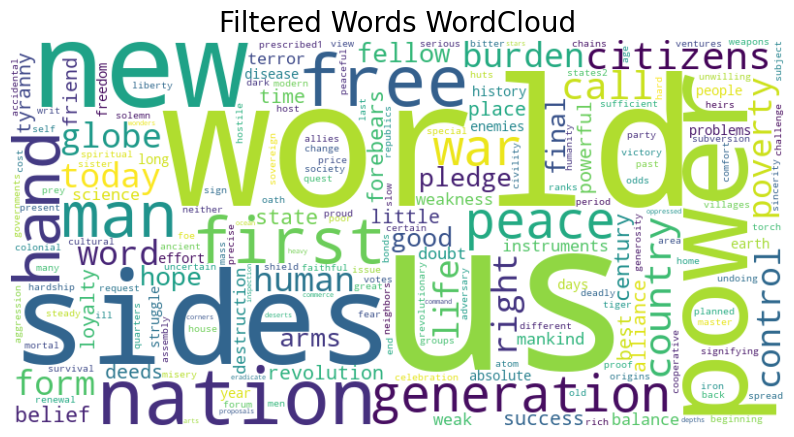

In [11]:
# wordcloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear') # interpolation='bilinear': 이미지 가장자리 부드럽게게
plt.axis('off')
plt.title('Filtered Words WordCloud', fontsize=20)
plt.show()

In [54]:
data = {
  "results": {
    "sunrise": "7:02:53 AM",
    "sunset": "5:05:32 PM",
    "solar_noon": "12:04:12 PM",
    "day_length": "10:02:39",
    "civil_twilight_begin": "6:36:19 AM",
    "civil_twilight_end": "5:32:05 PM",
    "nautical_twilight_begin": "6:04:40 AM",
    "nautical_twilight_end": "6:03:45 PM",
    "astronomical_twilight_begin": "5:33:43 AM",
    "astronomical_twilight_end": "6:34:42 PM"
  },
  "status": "OK",
  "tzid": "UTC"
}

type(data)

dict

In [57]:
data

{'results': {'sunrise': '7:02:53 AM',
  'sunset': '5:05:32 PM',
  'solar_noon': '12:04:12 PM',
  'day_length': '10:02:39',
  'civil_twilight_begin': '6:36:19 AM',
  'civil_twilight_end': '5:32:05 PM',
  'nautical_twilight_begin': '6:04:40 AM',
  'nautical_twilight_end': '6:03:45 PM',
  'astronomical_twilight_begin': '5:33:43 AM',
  'astronomical_twilight_end': '6:34:42 PM'},
 'status': 'OK',
 'tzid': 'UTC'}

In [55]:
data.keys()

dict_keys(['results', 'status', 'tzid'])

In [56]:
data['results'].keys()

dict_keys(['sunrise', 'sunset', 'solar_noon', 'day_length', 'civil_twilight_begin', 'civil_twilight_end', 'nautical_twilight_begin', 'nautical_twilight_end', 'astronomical_twilight_begin', 'astronomical_twilight_end'])

In [58]:
print(data['results']['sunset'])
print(data['results']['day_length'])

5:05:32 PM
10:02:39


In [12]:
import requests

url = 'https://api.sunrise-sunset.org/json?lat=36.7201600&lng=-4.4203400'
data = requests.get(url)
data.text

'{"results":{"sunrise":"5:34:00 AM","sunset":"6:58:40 PM","solar_noon":"12:16:20 PM","day_length":"13:24:40","civil_twilight_begin":"5:08:17 AM","civil_twilight_end":"7:24:22 PM","nautical_twilight_begin":"4:35:52 AM","nautical_twilight_end":"7:56:47 PM","astronomical_twilight_begin":"4:01:56 AM","astronomical_twilight_end":"8:30:44 PM"},"status":"OK","tzid":"UTC"}'

In [13]:
url = 'https://api.sunrise-sunset.org/json?lat=36.7201600&lng=-4.4203400'
data = requests.get(url).json()
data

{'results': {'sunrise': '5:34:00 AM',
  'sunset': '6:58:40 PM',
  'solar_noon': '12:16:20 PM',
  'day_length': '13:24:40',
  'civil_twilight_begin': '5:08:17 AM',
  'civil_twilight_end': '7:24:22 PM',
  'nautical_twilight_begin': '4:35:52 AM',
  'nautical_twilight_end': '7:56:47 PM',
  'astronomical_twilight_begin': '4:01:56 AM',
  'astronomical_twilight_end': '8:30:44 PM'},
 'status': 'OK',
 'tzid': 'UTC'}

In [61]:
print(data['results']['sunset'])
print(data['results']['day_length'])

6:58:40 PM
13:24:40


In [14]:
date = '2025-04-18'

url = f'https://api.sunrise-sunset.org/json?lat=36.7201600&lng=-4.4203400&date={date}'
data = requests.get(url).json()
data

{'results': {'sunrise': '5:37:54 AM',
  'sunset': '6:56:02 PM',
  'solar_noon': '12:16:58 PM',
  'day_length': '13:18:08',
  'civil_twilight_begin': '5:12:22 AM',
  'civil_twilight_end': '7:21:33 PM',
  'nautical_twilight_begin': '4:40:16 AM',
  'nautical_twilight_end': '7:53:39 PM',
  'astronomical_twilight_begin': '4:06:46 AM',
  'astronomical_twilight_end': '8:27:09 PM'},
 'status': 'OK',
 'tzid': 'UTC'}

In [15]:
print(data['results']['sunset'])
print(data['results']['day_length'])

6:56:02 PM
13:18:08


In [16]:
def by_date(date):
    url = f'https://api.sunrise-sunset.org/json?lat=36.7201600&lng=-4.4203400&date={date}'
    return requests.get(url).json()['results']

In [17]:
by_date('2025-04-18')

{'sunrise': '5:37:54 AM',
 'sunset': '6:56:02 PM',
 'solar_noon': '12:16:58 PM',
 'day_length': '13:18:08',
 'civil_twilight_begin': '5:12:22 AM',
 'civil_twilight_end': '7:21:33 PM',
 'nautical_twilight_begin': '4:40:16 AM',
 'nautical_twilight_end': '7:53:39 PM',
 'astronomical_twilight_begin': '4:06:46 AM',
 'astronomical_twilight_end': '8:27:09 PM'}

### DataFrame

In [66]:
sample_list = []

sample_list.append({'date': '2024-11-03', 'dayofweek' : 'sun'})
sample_list.append({'date': '2024-11-04', 'dayofweek' : 'mon'})
sample_list.append({'date': '2024-11-05', 'dayofweek' : 'tue'})

sample_list

[{'date': '2024-11-03', 'dayofweek': 'sun'},
 {'date': '2024-11-04', 'dayofweek': 'mon'},
 {'date': '2024-11-05', 'dayofweek': 'tue'}]

In [67]:
import pandas as pd

df = pd.DataFrame(sample_list)
df

,date,dayofweek
0,2024-11-03,sun
1,2024-11-04,mon
2,2024-11-05,tue


In [68]:
df.to_csv('sample.csv')

In [69]:
pd.read_csv('sample.csv')

,Unnamed: 0,date,dayofweek
0,0,2024-11-03,sun
1,1,2024-11-04,mon
2,2,2024-11-05,tue


In [70]:
df.to_csv('sample.csv', index=False)

In [71]:
pd.read_csv('sample.csv')

,date,dayofweek
0,2024-11-03,sun
1,2024-11-04,mon
2,2024-11-05,tue
